## Linear Regression, Logistic Regression and SVM: Different ways to fit hyperplane to the data.

### ***Introduction:***
In the realm of machine learning and statistical modeling, the techniques of Linear Regression, Logistic Regression, and Support Vector Machine (SVM) play pivotal roles in various applications. These methods are widely employed for their ability to model relationships between variables and classify data points into distinct classes. At the core of their functionality lies the concept of fitting hyperplanes to the data, facilitating effective separation and prediction tasks.

The motivation behind writing this notebook is to understand how there three very different algorithms(in the vanilla form) are basically just separated by different loss functions.

NOTE: these three algorithms are not used for similar tasks and are employed for different use cases.

### ***Project Objective: The objective of this Jupyter notebook is to elucidate how three seemingly distinct algorithms (linear regression, logistic regression, and SVM) in their vanilla forms are fundamentally united by the common thread of different loss functions governing their behavior.*** 

For each algorithm we will see the loss function, the derivatives and the implementation in python. 
1. Linear Regression
2. Logistic Regression
3. Support Vector Machine

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

### 1. Linear Regression 

***INTRODUCTION***

Linear Regression, a fundamental method in statistical modeling, focuses on establishing a linear relationship between a dependent variable and one or more independent variables. By fitting a hyperplane to the data, Linear Regression endeavors to minimize the sum of squared errors, effectively estimating the coefficients that define the best-fitting line. 

With its simplicity and interpretability, linear regression finds applications in diverse fields, including economics, social sciences, finance, and engineering, as well as serving as a building block for more complex machine learning algorithms.


In simple words if I have a data where there is a linear relationship between predictor(X) and response variable(Y), then the line of best fit is the regression line.

NOTE: [There are 5 total assumptions of linear regression](https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/)

***LOSS FUNCTION***

The loss function we minimize for linear regression is the squared loss: Squared loss, also known as mean squared error (MSE) or L2 loss, is a commonly used loss function in various machine learning algorithms, particularly in regression problems. The squared loss measures the discrepancy between the predicted values and the actual target values in a dataset. The basic idea is to minimize the average squared sum of difference in the predicted(y_cap) and the actual(y) value. 

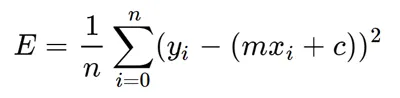

We will be minimizing the error term with gradient descent using the partial derivatives of loss function with respect to slope and intercept.

***DERIVATIVES***
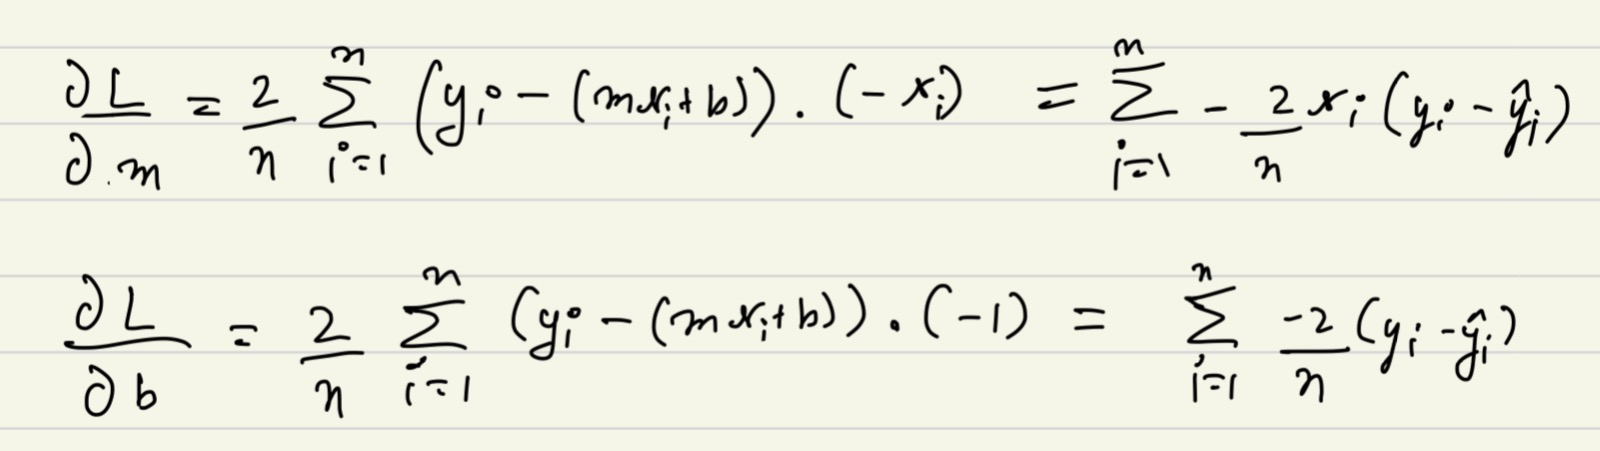

***PYTHON IMPLEMENTATION***

Shape of our data: (100, 2)
initial slope and intercept: [-0.00404689] [3.71004872]
Final slope and intercept: [2.99760246] [3.76284544]


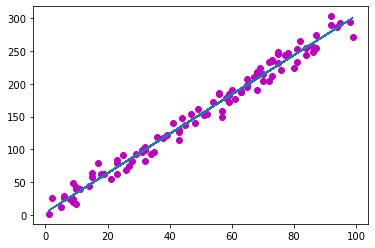

In [12]:
# Generate linear data
x = np.random.randint(1,100,size=100)
y = (3*x+4) + np.random.normal(0,10, len(x))
data = np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)
print('Shape of our data:', data.shape)

# plotting data points
plt.plot(data[:,0],data[:,1], 'mo')

# generating random points for both m and c
slope = np.random.normal(-1,5,1)
intercept = np.random.normal(-1,5,1)
print('initial slope and intercept:', slope,intercept)

param_lst = [(slope,intercept)]
learning_rate = 0.0001
iterations = 100

# Gradient Descent
for i in range(iterations):
    y_pred = slope*x + intercept
    # derivatives
    derivative_m = (-2/len(x))*sum(x * (y - y_pred))
    derivative_c = (-2/len(x))*sum(y-y_pred)
    # updating weights
    slope = slope - (learning_rate*derivative_m)
    intercept = intercept - (learning_rate*derivative_c)
    param_lst.append((slope, intercept))
print('Final slope and intercept:', slope, intercept)

plt.plot(x, x*slope + intercept)
plt.show()

<IPython.core.display.Javascript object>


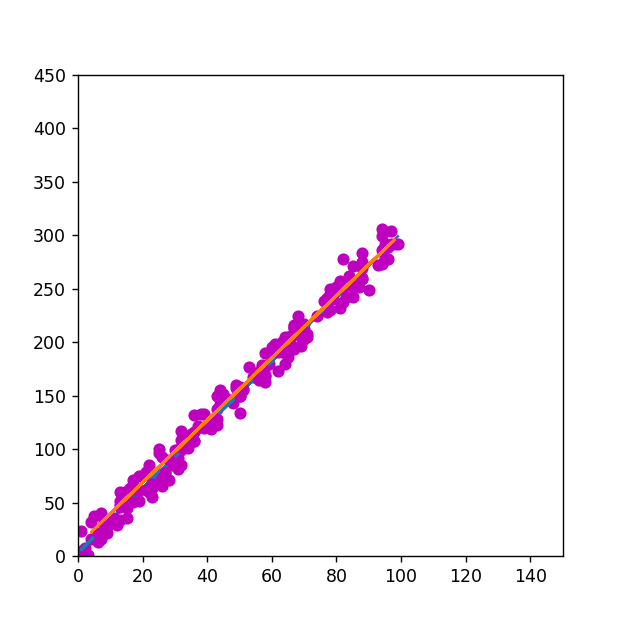

In [50]:
# please run the following cell to see an animation of how the line is fitting the data
# pleae note that %matplotlib notebook will cause problem with other graphics in this notebook
# it is recommended that you run this flow at the end of exploring this notebook.

from matplotlib.animation import FuncAnimation
%matplotlib notebook
points = param_lst
 
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)
 
def animate(i):
    ax.clear()
    # Get the point from the points list at index i
    point = points[i]
    # Plot that point using the x and y coordinates
    ax.plot(x,y, 'mo')
    ax.plot(x, x*point[0] + point[1])
    ax.set_xlim([0, 150])
    ax.set_ylim([0, 450])

ani = FuncAnimation(fig, animate, frames=len(points),
                    interval=300, repeat=False)
plt.show()

### 2. Logistic Regression 

***INTRODUCTION***

Logistic Regression is a fundamental and widely used statistical method in the field of machine learning and statistics. Despite its name, it is a classification algorithm rather than a regression algorithm. The technique is employed to model the relationship between a dependent binary variable (such as "yes" or "no," "0" or "1") and one or more independent variables (also known as features or predictors).

Now as you can see below the data is in blob format and the goal of logistic regression is to seperate these two blobs(classes) and the way we achieve it is simply gemerating a hyperplane which can seperate these classes. In simple word now we want to draw a line which can seperate red and green clusters below.

***LOSS FUNCTION***

Logistic loss is an essential concept that governs the training process of logistic regression models. The logistic loss, also referred to as log loss or cross-entropy loss, plays a pivotal role in quantifying the disparity between predicted probabilities and true binary labels. logistic loss function forms the backbone of logistic regression's optimization process. By quantifying the error between predicted probabilities and true binary labels, it guides the model toward making accurate classifications and effectively separating the two classes in the dataset. Understanding the mechanics of the logistic loss is pivotal for grasping the essence of logistic regression and its applications in binary classification tasks.

Please note that we are not using bias in the loss function and hence there will be no update on that.


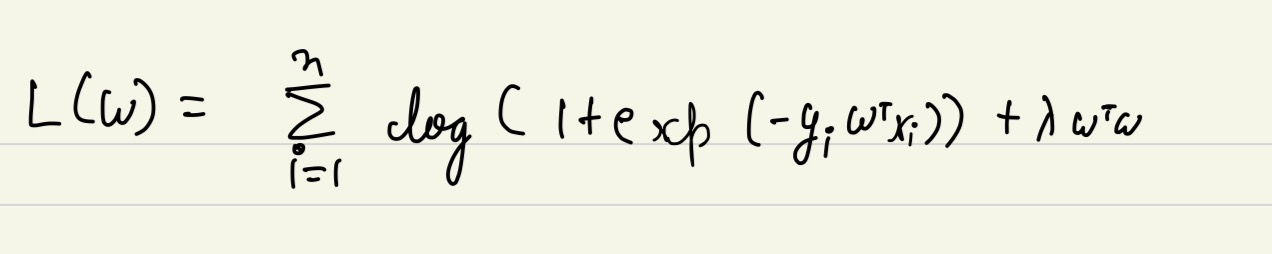

***DERIVATIVES***

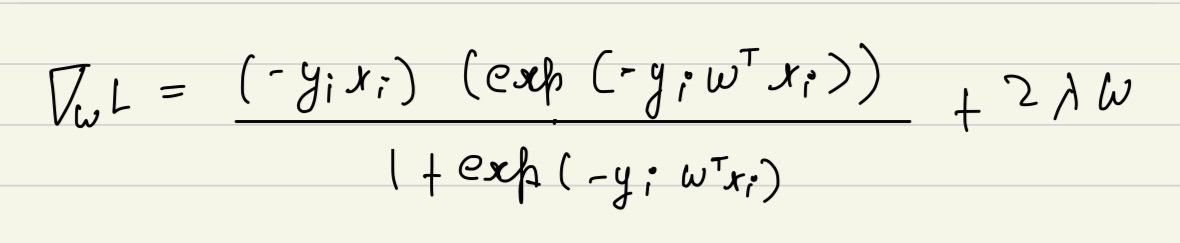


***PYTHON IMPLEMENTATION***

(100, 2)


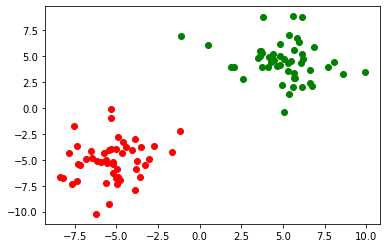

In [31]:
# generating data for classification

n = 50
blob_1 = np.random.normal(5,2,(n,2))
blob_2 = np.random.normal(-5,2,(n,2))
data = np.concatenate((blob_1, blob_2), axis=0)
labels = np.ones(n*2)
labels[n:] = -1
print(data.shape)

plt.plot(data[:n,0], data[:n,1], 'go')
plt.plot(data[n:,0], data[n:,1], 'ro')
plt.show()

In [168]:
# defining some helper functions

def initialize_weights(dimension):
    weights = np.random.randn(dimension)
    # bias = np.random.rand()
    return weights

weights = initialize_weights(2)
print('weights:\n', weights)

def get_prediction(x, weights):
    '''
    returns an array of shape (n) where n is len of x or number of pts in x.
    '''
    temp = np.dot(x, weights.reshape(-1,1))
    res = np.array(list(map(lambda x: -1 if x[0]<0 else 1, temp))) #update the fn -> x<0=-1 and x>0=+1 -> no <= or >=
    return res
# x = np.array([[1,2], [3,4]])
print('predictions:\n', get_prediction(data,weights))


def get_slope(w):
    return (-w[0] / w[1])
get_slope(weights) 

weights:
 [0.28547324 0.22523361]
predictions:
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


-1.2674539855334528

[-1.69898571  0.90357505]
[0.9299999999999999]
0.010000000000000009


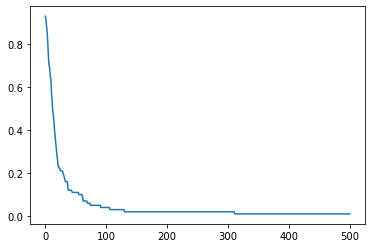

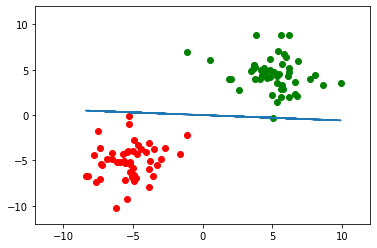

In [178]:
# Gradient descent for Linear Regression

weights= initialize_weights(data.shape[1])
iterations = 500
learning_rate = 0.01
print(weights)

y_pred = get_prediction(data, weights).flatten()
cost = [1 - accuracy_score(labels, y_pred)]
print(cost)

for i in range(iterations):
    dist_pt = np.dot(data, weights.reshape(-1,1))
    numerator = (data * -labels.reshape(-1,1)) * np.exp(dist_pt * -labels.reshape(-1,1))
    denominator = 1 + np.exp(dist_pt * -labels.reshape(-1,1))
    dw = np.sum(numerator/denominator, axis=0) / data.shape[0]
    
    weights = weights - (learning_rate * dw)
    
    y_pred = get_prediction(data, weights).flatten()
    cost.append(1 - accuracy_score(labels, y_pred))

print(cost[-1])    
#plotting cost
plt.plot(np.arange(iterations+1), cost)
plt.show()


# plotting the decision line with updated weights
m = get_slope(weights)

plt.plot(data[:n,0], data[:n,1], 'go')
plt.plot(data[n:,0], data[n:,1], 'ro')
plt.plot(data[:,0], data[:,0]*m)
plt.xlim(-12,12)
plt.ylim(-12,12)
plt.show()

The reason we see the optimization stop when the decision line intersects the green point above is because the optimization fn of logistic regression is : maximize summation(Y_i * (W.T, X_i)) => which implies that that we are maximizing the sum of signed distance, so the decision line above has no real reason to more any more. When we observe the decision boundary above we can see that this is not really the best decision line we can draw for this data, infact we can draw multiple decision boundaries which satisfy the objective, and this very question leads us to Support Vector Machines.   

### 3. Support Vector Machine

***INTRODUCTION***

In the landscape of machine learning algorithms, Support Vector Machines (SVMs) stand as a powerful and versatile tool for classification tasks. Originating in the field of statistical learning theory, SVMs have garnered widespread attention due to their ability to achieve remarkable accuracy in complex data scenarios while maintaining an elegant mathematical foundation.

Support Vector Machines are a class of supervised learning models that excel in scenarios where data points belong to distinct classes and need to be separated by a decision boundary. Unlike conventional linear classifiers, SVMs go beyond simply finding a boundary; they aim to identify the optimal hyperplane that not only segregates classes but also maximizes the margin between them. This margin, characterized by support vectors, refers to the closest data points to the decision boundary and plays a pivotal role in enhancing the model's generalization and robustness.

One of SVM's distinctive strengths lies in its ability to handle both linear and non-linear classification tasks. While linear SVMs work efficiently when classes are linearly separable, non-linear SVMs employ kernel functions to map the input data into higher-dimensional feature spaces, thereby enabling the separation of intricate class distributions.

We will be looking at a simple linearly seperable dataset and observe how the margin maximization approach of SVM yields the optimal hyperplane for seperation.

***LOSS FUNCTION***

At the heart of Support Vector Machines (SVMs) lies the hinge loss, a crucial element that drives the optimization process to identify the optimal hyperplane for classification tasks. The hinge loss is specifically designed to facilitate the creation of a decision boundary that effectively separates different classes of data points.

SVMs operate on the principle of finding a hyperplane that maximizes the margin between two classes while minimizing the classification error. This process is achieved through the minimization of the hinge loss, which is used as the objective function during training.

The hinge loss is a convex function that penalizes the model for incorrect predictions while allowing some tolerance for points that fall within a certain margin around the decision boundary.

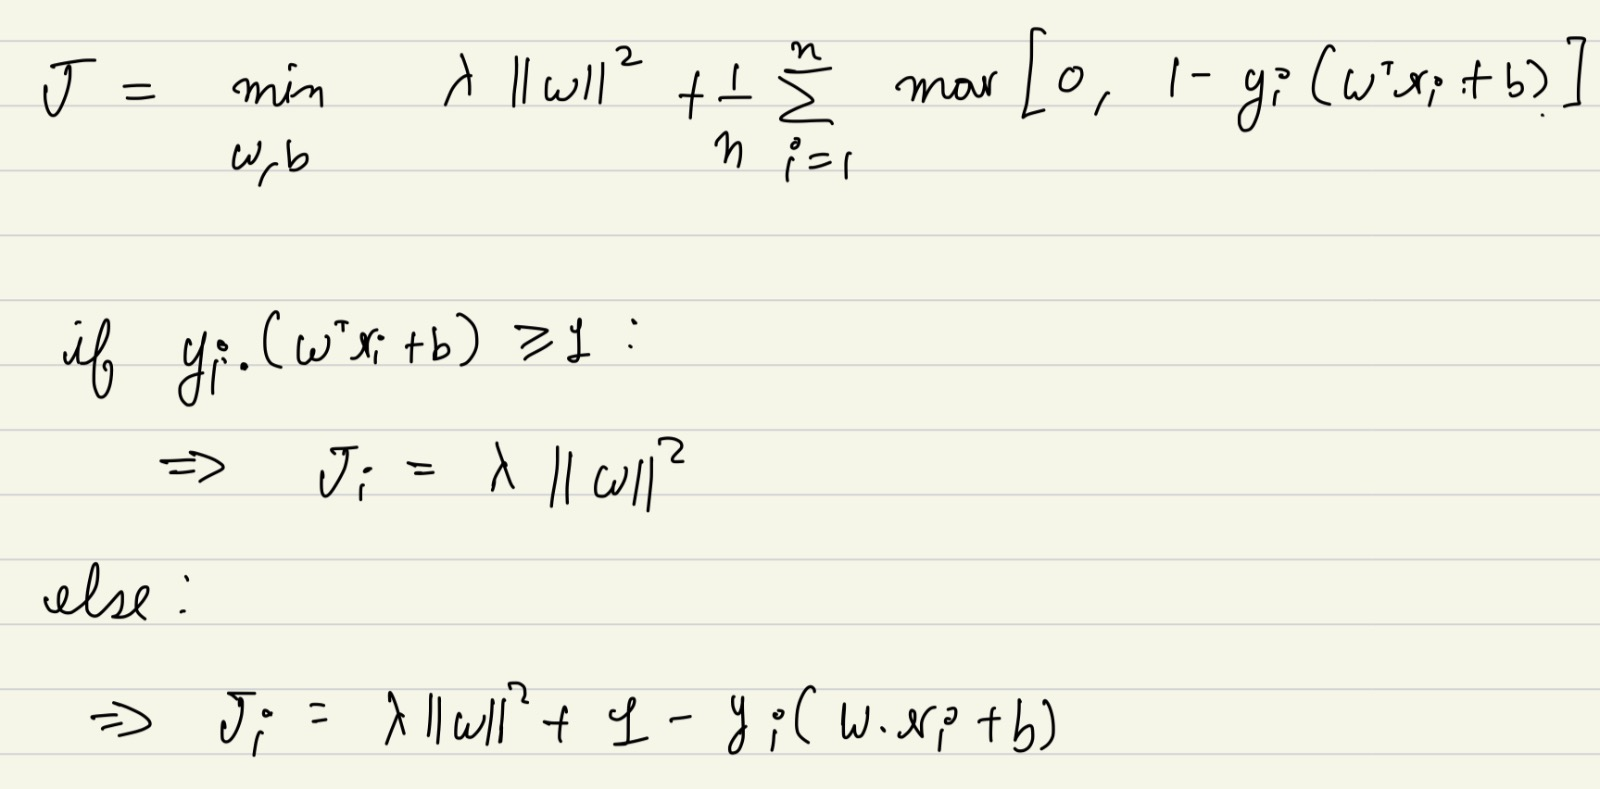

***DERIVATIVES***

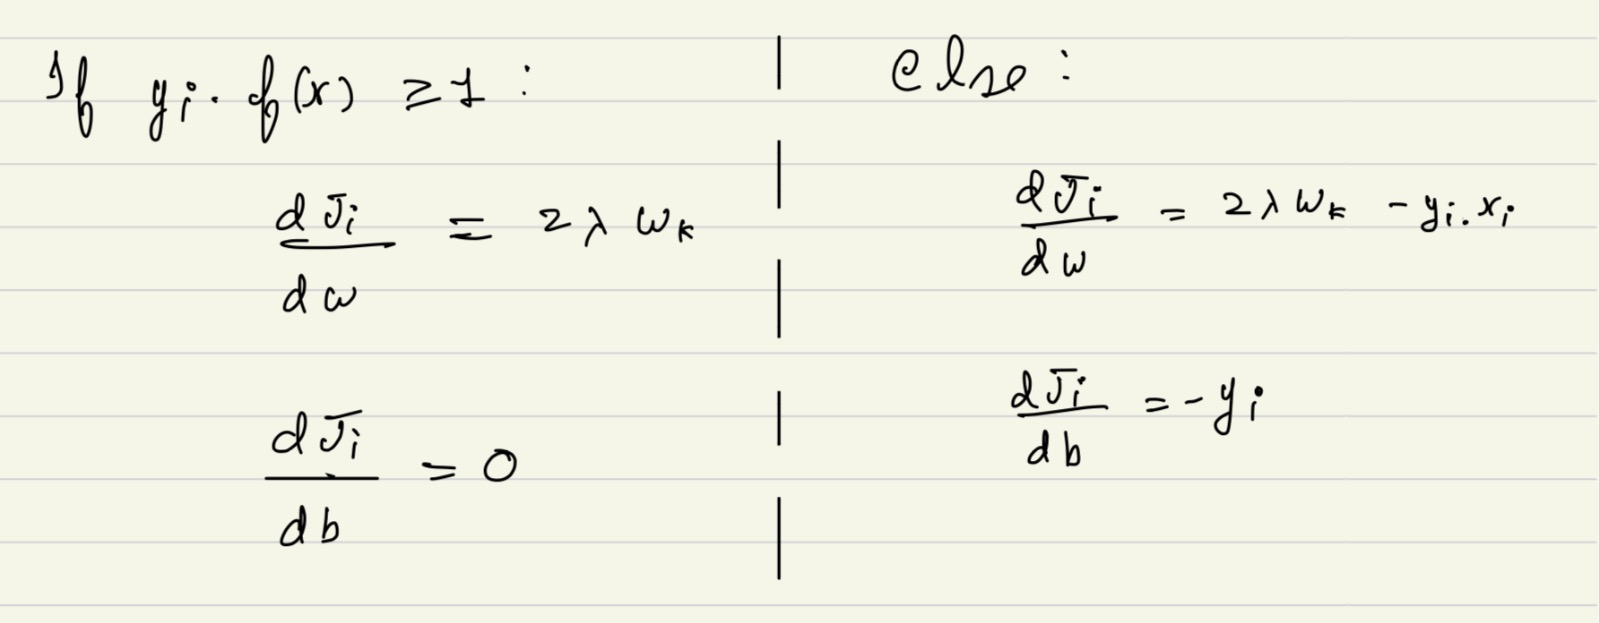


***PYTHON IMPLEMENTATION***

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

(100, 2)


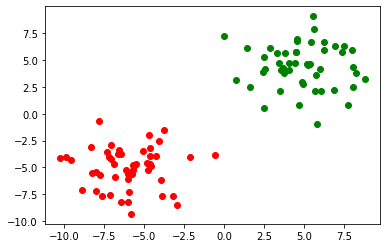

In [14]:
# generating blob data

n = 50
blob_1 = np.random.normal(5,2,(n,2))
blob_2 = np.random.normal(-5,2,(n,2))
data = np.concatenate((blob_1, blob_2), axis=0)
labels = np.ones(n*2)
labels[n:] = -1
print(data.shape)

plt.plot(data[:n,0], data[:n,1], 'go')
plt.plot(data[n:,0], data[n:,1], 'ro')
plt.show()

In [17]:
# SVM

# Defining fit function.
def svm_fit(data, labels, iterations=1000, lambda_param = 0.01, learning_rate = 0.001):
    w = np.zeros(data.shape[1])
    b = 0

    for _ in range(iterations):
        for i, xi in enumerate(data):
            condition = labels[i] * (np.dot(xi, w) - b)
            if condition >=1:
                # derivative
                dw = (2 * lambda_param * w)
                # update
                w -= learning_rate * dw
            else:
                # derivative
                dw = ((2 * lambda_param * w) - (xi * labels[i]))
                db = labels[i]
                # update
                w -= learning_rate * dw
                b -= learning_rate * db
    return(w,b)

w,b = svm_fit(data, labels)
print(w, b)

[0.27464743 0.26406275] -0.17400000000000013


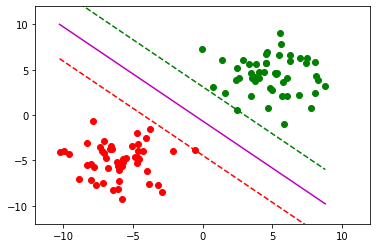

In [18]:
# plotting the decision line with updated weights

x_min = np.min(data[:, 0])
x_max = np.max(data[:, 0])

decision_line_y = [(-w[0] * x_min + b + 0) / w[1], (-w[0] * x_max + b + 0) / w[1]]
margin1_y = [(-w[0] * x_min + b + 1) / w[1], (-w[0] * x_max + b + 1) / w[1]]
margin2_y = [(-w[0] * x_min + b - 1) / w[1], (-w[0] * x_max + b - 1) / w[1]]

plt.plot(data[:n,0], data[:n,1], 'go')
plt.plot(data[n:,0], data[n:,1], 'ro')
plt.plot([x_min, x_max], decision_line_y, 'm-')
plt.plot([x_min, x_max], margin1_y, 'g--')
plt.plot([x_min, x_max], margin2_y, 'r--')
plt.xlim(-12,12)
plt.ylim(-12,12)
plt.show()

### Conclusion

In the realm of machine learning, this Jupyter notebook has embarked on a journey to unveil a fascinating connection that underlies three seemingly disparate algorithms: linear regression, logistic regression, and Support Vector Machines (SVMs). Through exploration and analysis, it has become clear that these algorithms, with their distinct applications and outcomes, are fundamentally applications of different loss functions.

Our endeavor has unraveled the significance of loss functions in shaping the behavior and optimization of these algorithms. In the case of linear regression, the mean squared error loss seeks to minimize the discrepancies between predictions and actual outcomes. On the other hand, logistic regression endeavors to minimize the logistic loss, effectively capturing the difference between predicted labels and true labels. Likewise, SVMs find their direction through the minimization of the hinge loss, propelling them to establish the optimal hyperplane for classification.